## Settings for plots

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

RESULTS_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results"
EXPERIMENT_DIR = "Pendulum-v0results"

AGENT_NAME = "ReverseKL"
ENV_NAME = "Pendulum-v0"

NUM_RUNS = 2  # number of runs per hyperparameter setting
HP_SWEEPS = [0, 1]  # the hyperparameter setting indices to plot

# The filenames within the results_dr/experiment_dir directory which contain the results of each run for each hyperparameter sweep
RESULTS_FILES = [[f"{ENV_NAME}_{AGENT_NAME}_setting_{hp}_run_{run}_EvalEpisodeMeanRewardsLC.txt" for run in range(NUM_RUNS)] for hp in HP_SWEEPS]

## Function Definitions

In [4]:
def get_results_for_experiment(results_dir, env_name, agent_name, num_runs, hp_sweeps=[0]):
    """
    get_results_for_experiment gets and returns all the results for a single experiment for the given arguments. 
    
    This function gets and returns all the results for all experiments run on a single environment with a single agent. 
    This may include multiple hyperparameter sweeps and multiple runs per hyperparameter settings. The return value of
    this function is a NumPy array of the form (N, R, D), where N is the number of hyperparamter settings tested, R is
    the number of runs per hyperparameter setting, and D is the number of evaluated data points (). 

    Note: the number of data files in the results directory should be len(hp_sweeeps) * num_runs
    
    Parameters
    ----------
    results_dir : str
        The path to the directory containing all results
    env_name : str
        The name of the environment that the experiment was run on
    agent_name : str
        The name of the agent which the experiments were run on
    num_runs : int
        The number of runs in the experiment per hyperparameter setting
    hp_sweeps : iter of int
        The settings indices for each hyperparameter setting, the settings indices are determined by the agent JSON files
    """
    results_files = [[f"{env_name}_{agent_name}_setting_{hp}_run_{run}_EvalEpisodeMeanRewardsLC.txt" for run in range(num_runs)] for hp in hp_sweeps]
    experiment_dir = env_name + "results"
    all_results = []
    for hp_settings_files in results_files:
        hp_runs = []
        for data_file in hp_settings_files:
            with open(os.path.join(results_dir, experiment_dir, data_file)) as data_file:
                results = data_file.read().split(" ")

            # Remove commas
            results = list(map(lambda x: x.rstrip(","), results))

            # Remove empty strings
            results = list(filter(lambda x: x != "", results))

            # Set to floats
            results = list(map(lambda x: float(x), results))

            hp_runs.append(results)
        
        all_results.append(hp_runs)

    return np.array(all_results)

In [5]:
# Get data points

all_results = get_results_for_experiment(RESULTS_DIR, ENV_NAME, AGENT_NAME, NUM_RUNS, HP_SWEEPS)

# Calculate the mean and standard error over all runs for each hyperparameter setting
mean_all_results = all_results.mean(axis=1)
std_dev_all_results = np.std(all_results, axis=1) / np.sqrt(NUM_RUNS)

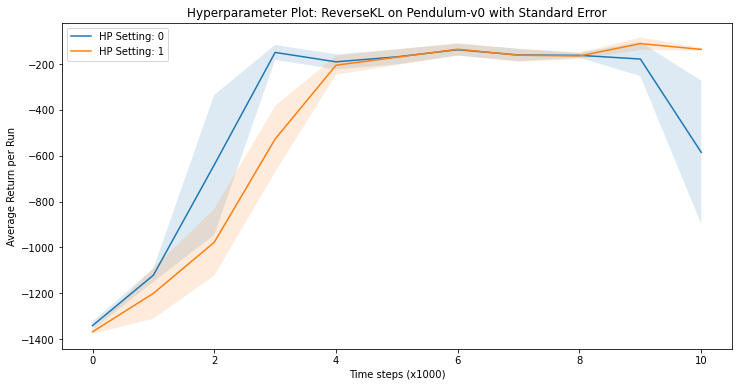

In [8]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

for hp_setting in range(all_results.shape[0]):
    x = np.arange(0, all_results.shape[-1])
    
    mean = mean_all_results[hp_setting]
    std = std_dev_all_results[hp_setting]
    
    ax.fill_between(x, mean - std, mean + std, alpha=0.15)
    ax.plot(x, mean, label=f"HP Setting: {HP_SWEEPS[hp_setting]}")

ax.set_title(f"Hyperparameter Plot: {AGENT_NAME} on {ENV_NAME} with Standard Error")
ax.set_xlabel("Time steps (x1000)")
ax.set_ylabel("Average Return per Run")
ax.legend()

fig.show()